# Exos pandas 2

*Exercice 6* - Traitement des valeurs manquantes :
- Téléchargez le fichier CSV "sales_data.csv" à partir du lien suivant : https://github.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/data/sales_data.csv
- Chargez le fichier dans un DataFrame nommé "sales_df".
- Affichez le nombre de valeurs manquantes dans chaque colonne du DataFrame.

*Exercice 11* - Comparaison des âges des étudiants en fonction du statut de réussite :
D'accord, merci de me fournir les noms corrects des colonnes du fichier CSV "sales_data.csv". Voici l'exercice mis à jour en utilisant les bonnes colonnes :

Exercice sur le jeu de données "sales_data" :

Le jeu de données "sales_data.csv" contient des informations sur les ventes de produits dans un magasin. Chaque ligne représente une transaction avec les colonnes suivantes :

- `Date`: La date de la transaction.
- `Product`: Le nom du produit vendu.
- `Unit_Price`: Le prix unitaire du produit.
- `Order_Quantity`: Le nombre d'unités vendues.

Votre tâche est de réaliser les étapes suivantes :

- Chargez le fichier "sales_data.csv" dans un DataFrame nommé "sales_df".
- Affichez les 10 premières lignes du DataFrame pour visualiser les données.
- Calculez le chiffre d'affaires total réalisé sur l'ensemble des transactions.
- Tracez un graphique à barres montrant les 5 produits les plus vendus (en termes de quantité) avec le nom du produit sur l'axe des x et la quantité vendue sur l'axe des y.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargez le fichier dans un DataFrame nommé "sales_df"
sales_df = pd.read_csv('./sources/sales_data.csv')

# Affichez les 10 premières lignes du DataFrame pour visualiser les données.
print(sales_df.head(10))

# Affichez le nombre de valeurs manquantes dans chaque colonne du DataFrame
print(sales_df.isna().apply(sum))

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   
5  2016-05-15   15       May  2016            47  Adults (35-64)   
6  2014-05-22   22       May  2014            47  Adults (35-64)   
7  2016-05-22   22       May  2016            47  Adults (35-64)   
8  2014-02-22   22  February  2014            35  Adults (35-64)   
9  2016-02-22   22  February  2016            35  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2          

In [30]:
# Calculez le chiffre d'affaires total réalisé sur l'ensemble des transactions.

# simple addition des revenus
cda = sales_df['Revenue'].sum()
print(f'{cda:,} brouzoufs')

# multiplication brute du prix par la quantité (sans doute sans les taxes)
cda2 = (sales_df['Order_Quantity'] * sales_df['Unit_Price'])
print(f'{cda2.sum():,} brouzoufs sans les taxes')


85,271,008 brouzoufs
95,176,318 brouzoufs sans les taxes


                 Product  Order_Quantity
0  Water Bottle - 30 oz.          164086
1    Patch Kit/8 Patches          157583
2     Mountain Tire Tube          102792
3           AWC Logo Cap           67316
4  Sport-100 Helmet, Red           63663


<Axes: xlabel='Product', ylabel='Order_Quantity'>

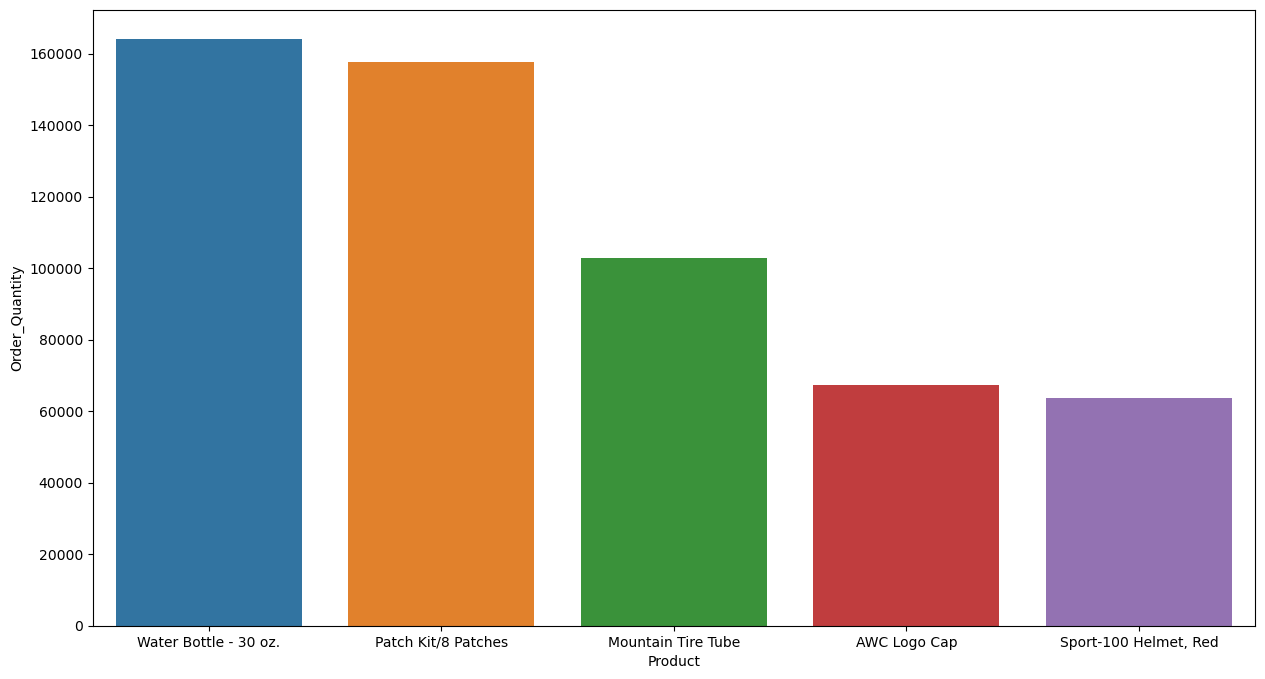

In [41]:
# Tracez un graphique à barres montrant les 5 produits les plus vendus (en termes de quantité)
# avec le nom du produit sur l'axe des x et la quantité vendue sur l'axe des y.

qte = sales_df[['Order_Quantity', 'Product']].groupby('Product').sum()
qte = qte.sort_values('Order_Quantity', ascending=False)
qte = qte.reset_index()
print(qte[:5])

plt.figure(figsize=(15,8))
sns.barplot(qte[:5], x="Product", y="Order_Quantity")


**Exercice 7** - Suppression des doublons :
- Téléchargez le fichier CSV "GlobalLandTemperaturesByMajorCity.csv" à partir du lien suivant : https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv
- Chargez le fichier dans un DataFrame nommé "duplicate_df".
- Supprimez les lignes en double du DataFrame.
- Afficher la taille des Dataframes avant et après

**Exercice 8** - Remplacement des valeurs incorrectes :
- Chargez le fichier dans un DataFrame nommé "temperature_df".
- Remplacez les valeurs négatives dans la colonne "AverageTemperature" par la valeur absolue de ces valeurs.
- Afficher le minimum avant et après

In [122]:
# temp = pd.read_csv("./sources/GlobalLandTemperaturesByMajorCity.csv")
duplicate_df = pd.read_csv("./sources/GlobalLandTemperaturesByMajorCity.csv")
print(duplicate_df.shape[0])
duplicate_df = duplicate_df.drop_duplicates()
print(duplicate_df.shape[0], '\n')

# les valeurs nulles : 
print(duplicate_df.isna().apply(sum), '\n')

# drop les lignes inutiles
masque = duplicate_df['AverageTemperature'].isna()
temp_df = duplicate_df[~masque] # la methode .dropna() devrait faire mieux
print(temp_df)

239184
239177 

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64 

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239178  2013-04-01              12.563                          1.823   
239179  2013-05-01              18.979                          0.807   
239180  2013-06-01              23.522 

In [75]:
# Afficher le minimum de Température Moyenne pour chaque ville
mintemp = temp_df[['City', 'AverageTemperature']].groupby('City').min()
print(mintemp)

# Remplacez les valeurs négatives dans la colonne "AverageTemperature" par la valeur absolue de ces valeurs
# neg = temp_df[temp_df['AverageTemperature'] < 0]['AverageTemperature'].apply(abs)
# print(neg)
temp_df.loc[temp_df['AverageTemperature'] < 0, 'AverageTemperature'] = temp_df['AverageTemperature'].abs()
mintemp = temp_df[['City', 'AverageTemperature']].groupby('City').min()
print(mintemp)


             AverageTemperature
City                           
Abidjan                  22.363
Addis Abeba              14.528
Ahmadabad                16.792
Aleppo                    0.670
Alexandria               10.227
...                         ...
Tokyo                    -1.580
Toronto                 -15.502
Umm Durman               18.508
Wuhan                    -0.305
Xian                     -6.418

[100 rows x 1 columns]
             AverageTemperature
City                           
Abidjan                  22.363
Addis Abeba              14.528
Ahmadabad                16.792
Aleppo                    0.670
Alexandria               10.227
...                         ...
Tokyo                     0.004
Toronto                   0.011
Umm Durman               18.508
Wuhan                     0.189
Xian                      0.009

[100 rows x 1 columns]


**Exercice 9** - Extraction de données :
- Téléchargez le fichier CSV "email_jetable.csv" à partir du lien suivant : https://sql.sh/ressources/sql-email-jetable/email_jetable.csv
- Chargez le fichier dans un DataFrame nommé "emails_df".
- Donnez un nom aux colonnes: [index, emails]
- Créez une nouvelle colonne "extension" contenant uniquement l’extension du domaines des adresses e-mail (com, fr etc…).
- Affichez les valeurs unique de la colonne “extension”

In [196]:
emails_df = pd.read_csv("./sources/email_jetable.csv", header=None, index_col=0)

# Donnez un nom aux colonnes: [index, emails]
emails_df.reset_index(inplace=True)
emails_df.columns = ('Index', 'Emails')
print(emails_df.head(), '\n')

# Créez une nouvelle colonne "extension" 
emails_df['Extension'] = 0

# contenant uniquement l’extension du domaines des adresses e-mail (com, fr etc…).
ext = emails_df['Emails'].str.split('.') # va créer un objet Series
for i,v in ext.items() :
    emails_df['Extension'][i] = v[-1]

print(emails_df.head(), '\n')

# Affichez les valeurs unique de la colonne “extension”
uniq_ext = emails_df.groupby('Extension').count().sort_values('Emails', ascending=False)
uniq_ext.reset_index(inplace=True)
uniq_ext.drop(['Emails'], axis=1, inplace=True)
uniq_ext.columns = ('Extension', 'Nombre')
print(uniq_ext.head(), '\n', f'différents domaines : {uniq_ext.shape[0]}')

   Index                  Emails
0      1  0815.ru0clickemail.com
1      2              0-mail.com
2      3                0wnd.net
3      4                0wnd.org
4      5        10minutemail.com 

   Index                  Emails Extension
0      1  0815.ru0clickemail.com       com
1      2              0-mail.com       com
2      3                0wnd.net       net
3      4                0wnd.org       org
4      5        10minutemail.com       com 

  Extension  Nombre
0       com     174
1       net      37
2        de      17
3      info      15
4       org      15 
 différents domaines : 30


C:\Users\poulp\AppData\Local\Temp\ipykernel_8944\2959816930.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails_df['Extension'][i] = v[-1]
